In [1]:
from matplotlib import cm, colors
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure, show, rc
import numpy as np
import pandas as pd
# %matplotlib inline
plt.rcParams["font.sans-serif"] = 'SimHei'  # 解决中文乱码问题
plt.rcParams['axes.unicode_minus'] = False  # 解决负号无法显示的问题
plt.rc('axes', axisbelow=True)


## (a) 单数剧系列柱形图

Text(0, 0.5, 'Price')

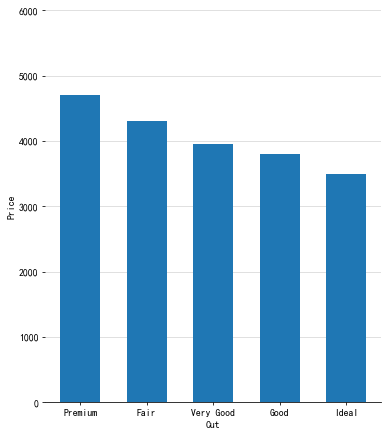

In [2]:
mydata = pd.DataFrame({'Cut': ["Fair", "Good", "Very Good", "Premium", "Ideal"],
                       'Price': [4300, 3800, 3950, 4700, 3500]})

Sort_data = mydata.sort_values(by='Price', ascending=False)

fig = plt.figure(figsize=(6, 7), dpi=70)
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
plt.grid(axis="y", c=(217/256, 217/256, 217/256))  # 设置网格线
# 将网格线置于底层
ax = plt.gca()  # 获取边框
ax.spines['top'].set_color('none')  # 设置上‘脊梁’为红色
ax.spines['right'].set_color('none')  # 设置上‘脊梁’为无色
ax.spines['left'].set_color('none')  # 设置上‘脊梁’为无色

plt.bar(Sort_data['Cut'], Sort_data['Price'],
        width=0.6, align="center", label="Cut")

plt.ylim(0, 6000)  # 设定x轴范围
plt.xlabel('Cut')
plt.ylabel('Price');


## b)双数剧系列柱形图

In [3]:
df = pd.read_csv('MultiColumn_Data.csv')
df = df.sort_values(by='1996', ascending=False)
df


,Catergory,1996,1997
0,Temporary\nStream,7.67,5.84
1,Permanent\nStream,4.02,6.45
2,Lake,3.95,6.76


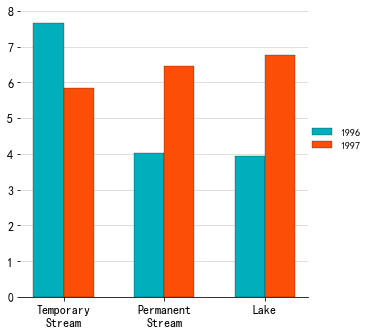

In [4]:
x_label = np.array(df["Catergory"])
x = np.arange(len(x_label))
y1 = np.array(df["1996"])
y2 = np.array(df["1997"])

fig = plt.figure(figsize=(5, 5))
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)  # 设置绘图区域大小位置

plt.bar(x, y1, width=0.3, color='#00AFBB', label='1996', edgecolor='k',
        linewidth=0.25)  # 调整y1轴位置，颜色，label为图例名称，与下方legend结合使用
plt.bar(x+0.3, y2, width=0.3, color='#FC4E07', label='1997',
        edgecolor='k', linewidth=0.25)  # 调整y2轴位置，颜色，label为图例名称，与下方legend结合使用
plt.xticks(x+0.15, x_label, size=12)  # 设置x轴刻度，位置,大小

# 显示图例，loc图例显示位置(可以用坐标方法显示），ncol图例显示几列，默认为1列,frameon设置图形边框
plt.legend(loc=(1, 0.5), ncol=1, frameon=False)

plt.yticks(size=12)  # 设置y轴刻度，位置,大小
plt.grid(axis="y", c=(217/256, 217/256, 217/256))  # 设置网格线
# 将y轴网格线置于底层
# plt.xlabel("Quarter",labelpad=10,size=18,)                          #设置x轴标签,labelpad设置标签距离x轴的位置
# plt.ylabel("Amount",labelpad=10,size=18,)                                   #设置y轴标签,labelpad设置标签距离y轴的位置


ax = plt.gca()  
ax.spines['top'].set_color('none')  # 设置上‘脊梁’为无色
ax.spines['right'].set_color('none')  # 设置右‘脊梁’为无色
ax.spines['left'].set_color('none')  # 设置左‘脊梁’为无色


## c)堆积柱形图

In [5]:
df = pd.read_csv('StackedColumn_Data.csv')
df = df.set_index("Clarity")
df


,I1,SI2,SI1,VS2,VS1,S2,S1,IF
Clarity,,,,,,,,
Fair,150,400,390,300,130,100,100,150
Good,1200,1100,1700,900,790,1300,1200,1100
Very_Good,1300,2300,3300,1900,1800,1900,1700,1300
Premium,2800,2900,3500,2800,3000,1800,1600,1280
Ideal,2000,2700,4200,3300,4200,2700,2100,1300


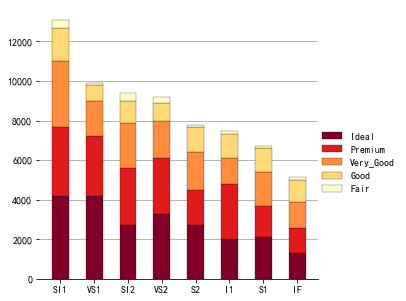

In [6]:
Sum_df = df.apply(lambda x: x.sum(), axis=0).sort_values(ascending=False)
df = df.loc[:, Sum_df.index]

meanRow_df = df.apply(lambda x: x.mean(), axis=1)
Sing_df = meanRow_df.sort_values(ascending=False).index

n_row, n_col = df.shape
# x_label=np.array(df.columns)
x_value = np.arange(n_col)

cmap = cm.get_cmap('YlOrRd_r', n_row)
color = [colors.rgb2hex(cmap(i)[:3]) for i in range(cmap.N)]

bottom_y = np.zeros(n_col)

fig = plt.figure(figsize=(5, 5))
#plt.subplots_adjust(left=0.1, right=0.9, top=0.7, bottom=0.1)

for i in range(n_row):
    label = Sing_df[i]
    plt.bar(x_value, df.loc[label, :], bottom=bottom_y, width=0.5,
            color=color[i], label=label, edgecolor='k', linewidth=0.25)
    bottom_y = bottom_y+df.loc[label, :].values

plt.xticks(x_value, df.columns, size=10)  # 设置x轴刻度
# plt.tick_params(axis="x",width=5)

plt.legend(loc=(1, 0.3), ncol=1, frameon=False)

plt.grid(axis="y", c=(166/256, 166/256, 166/256))

ax = plt.gca()  # 获取整个表格边框
ax.spines['top'].set_color('none')  # 设置上‘脊梁’为无色
ax.spines['right'].set_color('none')  # 设置右‘脊梁’为无色
ax.spines['left'].set_color('none')  # 设置左‘脊梁’为无色


## d) 百分比堆积柱形图

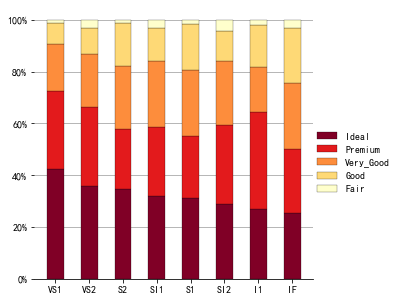

In [7]:
df = pd.read_csv('StackedColumn_Data.csv')

df = df.set_index("Clarity")

SumCol_df = df.apply(lambda x: x.sum(), axis=0)

df = df.apply(lambda x: x/SumCol_df, axis=1)

meanRow_df = df.apply(lambda x: x.mean(), axis=1)


Per_df = df.loc[meanRow_df.idxmax(), :].sort_values(ascending=False)


Sing_df = meanRow_df.sort_values(ascending=False).index


df = df.loc[:, Per_df.index]

n_row, n_col = df.shape

x_value = np.arange(n_col)

cmap = cm.get_cmap('YlOrRd_r', n_row)
color = [colors.rgb2hex(cmap(i)[:3]) for i in range(cmap.N)]

bottom_y = np.zeros(n_col)

fig = plt.figure(figsize=(5, 5))
#plt.subplots_adjust(left=0.1, right=0.9, top=0.7, bottom=0.1)

for i in range(n_row):
    label = Sing_df[i]
    plt.bar(x_value, df.loc[label, :], bottom=bottom_y, width=0.5,
            color=color[i], label=label, edgecolor='k', linewidth=0.25)
    bottom_y = bottom_y+df.loc[label, :].values

plt.xticks(x_value, df.columns, size=10)  # 设置x轴刻度
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100)
                           for x in plt.gca().get_yticks()])

plt.legend(loc=(1, 0.3), ncol=1, frameon=False)

plt.grid(axis="y", c=(166/256, 166/256, 166/256))

ax = plt.gca()  # 获取整个表格边框
ax.spines['top'].set_color('none')  # 设置上‘脊梁’为无色
ax.spines['right'].set_color('none')  # 设置右‘脊梁’为无色
ax.spines['left'].set_color('none')  # 设置左‘脊梁’为无色
